## Association Analysis



## Loading Libraries

### There are two different libraries in python apyori and mlxtend to do the association analysis. I did the project by both the libraries. 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly_express as px
from scipy import stats
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 10.0) # default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'Spectral'
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


## Data Preprocessing

### After reading the data, I got shape of the data i.e., 3333 instances with 21 variables. After initial exploration, I subset the data and got the four variables i.e., VMail Plan, Intl Plan, CustServ Calls, and Churn (as per the project requirement). VMail Plan, Intl Plan and Churn are categorical variables. Although CustServ Calls is ordinal. 

In [4]:
df=pd.read_csv(r"C:\Users\salon\Desktop\DATA SCIENCE\Predictive Analytics\week7\data.csv")
print(df.shape)
df.head(3)

(3333, 21)


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [7]:
df.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
display(df.isnull().sum()) # no null values

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn             0
dtype: int64

In [5]:
df = df.rename(columns={'Churn?': 'Churn'}) #renaming Churn? to Churn

In [6]:
df2=df[["VMail Plan", "Int'l Plan" , "CustServ Calls", "Churn"]] # Subsetting the data

In [7]:
df2.iloc[:,2].value_counts() # Custmor Service calls with their respective frequency

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: CustServ Calls, dtype: int64

## Exploratory Data Analysis

### In EDA, first I used doughnut plot to explore how Churn variable is distributed in between yes(Churned) and no(not Churned). I found that in this data 85.5% are not churned where as 14.5% are churned. To understand the distribution of the variables with respect to Churn is explored as below. I found that the very less number of people with internation plan has churned. Moreover, people having the VMail plan doesn't have a big affect in churning. People who called customer service atleast once have most churned customers indicating bad customer service.  Although most people called atleast once. 

In [40]:
sums = df2.Churn.groupby(df2.Churn).count()
sums

Churn
False.    2850
True.      483
Name: Churn, dtype: int64

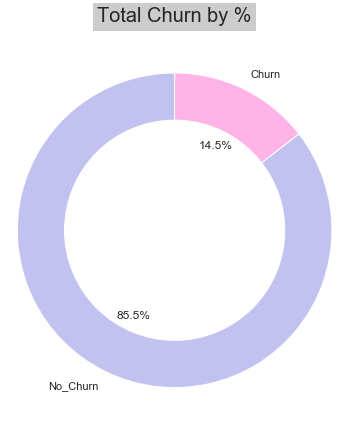

In [54]:
import matplotlib.pyplot as plt
# Pie chart
labels = ['No_Churn','Churn']
#colors
colors = ['#c2c2f0','#ffb3e6']
fig1, ax1 = plt.subplots(figsize=(5,6))
ax1.pie(sums, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title("Total Churn by %", bbox={'facecolor':'0.8', 'pad':5}, fontsize=20)
plt.show()

Text(0.5, 0.98, 'Distribution of Different Variables')

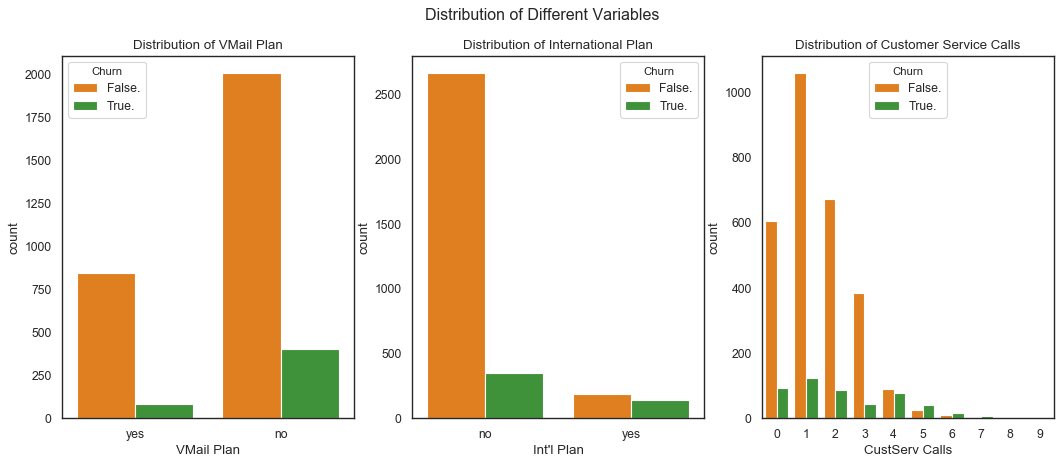

In [29]:
import itertools
fig, axarr = plt.subplots(1, 3, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
sns.set(style="white")
sns.countplot(x='VMail Plan', hue = 'Churn',data = df2, ax=axarr[0], palette="Paired_r")
axarr[0].set_title('Distribution of VMail Plan')
sns.countplot(x="Int'l Plan", hue = 'Churn',data = df2, ax=axarr[1], palette="Paired_r")
axarr[1].set_title('Distribution of International Plan')
sns.countplot(x='CustServ Calls', hue = 'Churn',data = df2, ax=axarr[2], palette="Paired_r")
axarr[2].set_title('Distribution of Customer Service Calls')
fig.suptitle("Distribution of Different Variables")

### As Apyori library takes the values of the variables to show the association, so having same yes or no categories will not be conclusive. Therefore I renamed according to their variable names as below. Also changed the dataframe into the array.

In [8]:
df2.replace(to_replace={"VMail Plan": {'yes':'VMail', 'no':'No_VMail'}, "Int'l Plan":{'yes':'INT', 'no':'NOINT'}}, 
            inplace=True)
df2.head()

c:\users\salon\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6666: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,VMail Plan,Int'l Plan,CustServ Calls,Churn
0,VMail,NOINT,1,False.
1,VMail,NOINT,1,False.
2,No_VMail,NOINT,0,False.
3,No_VMail,INT,2,False.
4,No_VMail,INT,3,False.


In [9]:
df3=df2.rename(columns={"VMail Plan": "A", "Int'l Plan": "B", "CustServ Calls":"C", "Churn":"D"})

In [10]:
rec = []
for i in range(3333):
    rec.append([str(df3.values[i,j]) for j in range(0, 4)])

## Association Analysis

### Association rules analysis is a technique to unveil how one item is associated with other in a large data set.  Apriori is an algorithm used to explore association analysis. We use below measures to understand the association.

#### * Support is a measure of how frequently the itemset appears in the dataset. 

#### * Confidence is a measure of how often the rule has been found to be true. For example, for a rule A=>B  the percentage in which B is bought with A is Confidence.

#### * Lift is the ratio of the observed support to that expected if the two rules were independent 

### A high support means that the rule occurs very frequently, while a high confidence indicates that the rule has a high predictive power. Association rule is expected to show a strong relationship between the items.

### As per the project requirement, the minimum support is set to 1%, the minimum rule confidence is set to 5%, and the maximum number of antecedents to 1(max_length). For antecedent support, in Apyori library, we don't have any option. The results are filtered by the minimum lift as 4.

### From the analysis, I got maximum lift to 4.96 whereas support is 1% and confidence is 52%. Moreover the rule is Customer service call 5 is associated with True Churning and No international plan. Other results are also given as below.

#### Although in the given rules, I didn't get Churn as antecedent but there is no setting to acheive this  in this library.

In [11]:
from apyori import apriori  
Rules=list(apriori(rec, min_support=0.01,min_confidence=0.05,max_len=1, min_lift=4, use_colnames=True))

In [12]:
Rules

[RelationRecord(items=frozenset({'5', 'True.'}), support=0.012001200120012, ordered_statistics=[OrderedStatistic(items_base=frozenset({'5'}), items_add=frozenset({'True.'}), confidence=0.606060606060606, lift=4.182194616977225), OrderedStatistic(items_base=frozenset({'True.'}), items_add=frozenset({'5'}), confidence=0.08281573498964802, lift=4.182194616977225)]),
 RelationRecord(items=frozenset({'INT', 'True.', '0'}), support=0.011701170117011701, ordered_statistics=[OrderedStatistic(items_base=frozenset({'INT'}), items_add=frozenset({'True.', '0'}), confidence=0.12074303405572756, lift=4.374310135953695), OrderedStatistic(items_base=frozenset({'True.', '0'}), items_add=frozenset({'INT'}), confidence=0.42391304347826086, lift=4.374310135953695)]),
 RelationRecord(items=frozenset({'5', 'NOINT', 'True.'}), support=0.0102010201020102, ordered_statistics=[OrderedStatistic(items_base=frozenset({'5'}), items_add=frozenset({'NOINT', 'True.'}), confidence=0.5151515151515151, lift=4.96242774566

In [13]:
for i in range(len(Rules)):
    LHS=list(Rules[i][2][0][0])
    RHS=list(Rules[i][2][0][1])
    support=Rules[i][1]
    confidence=Rules[i][2][0][2]
    lift=Rules[i][2][0][3]
    print("LHS:",LHS,"--","RHS:",RHS)
    print("Support:",support*100,"%")
    print("Confidence:",confidence*100,"%")
    print("Lift:",lift)
    print(10*"**********")

LHS: ['5'] -- RHS: ['True.']
Support: 1.2001200120012 %
Confidence: 60.606060606060595 %
Lift: 4.182194616977225
****************************************************************************************************
LHS: ['INT'] -- RHS: ['True.', '0']
Support: 1.17011701170117 %
Confidence: 12.074303405572756 %
Lift: 4.374310135953695
****************************************************************************************************
LHS: ['5'] -- RHS: ['NOINT', 'True.']
Support: 1.02010201020102 %
Confidence: 51.515151515151516 %
Lift: 4.96242774566474
****************************************************************************************************
LHS: ['INT'] -- RHS: ['True.', 'VMail']
Support: 1.08010801080108 %
Confidence: 11.145510835913313 %
Lift: 4.643498452012385
****************************************************************************************************


### I again ran the codes for minimum lift with value 2 and found below results. From these results, I plotted a scatter plot and compared support with confidence. In this plot, lower value of support indicating higher confidence value.

In [90]:
from apyori import apriori  
Rules1=list(apriori(rec, min_support=0.01,min_confidence=0.05,max_len=1, min_lift=2, use_colnames=True))

In [91]:
l=[]
m=[]
m1=[]
n=[]
o=[]
for i in range(len(Rules1)):
    
    LHS=list(Rules1[i][2][0][0])
    RHS=list(Rules1[i][2][0][1])
    support=Rules1[i][1]
    confidence=Rules1[i][2][0][2]
    lift=Rules1[i][2][0][3]
    l.append(round(support,2))
    m.append(round(confidence,2))
    m1.append(round(lift,2))
    print("LHS:",LHS,"--","RHS:",RHS)
    n.append(LHS)
    o.append(RHS)
    print("Support:",support)
    print("Confidence:",confidence)
    print("Lift:",lift)

LHS: ['4'] -- RHS: ['True.']
Support: 0.022802280228022803
Confidence: 0.4578313253012048
Lift: 3.1593205118611087
LHS: ['5'] -- RHS: ['True.']
Support: 0.012001200120012
Confidence: 0.606060606060606
Lift: 4.182194616977225
LHS: ['INT'] -- RHS: ['True.']
Support: 0.0411041104110411
Confidence: 0.4241486068111455
Lift: 2.9268888333365384
LHS: ['INT'] -- RHS: ['True.', '0']
Support: 0.011701170117011701
Confidence: 0.12074303405572756
Lift: 4.374310135953695
LHS: ['INT'] -- RHS: ['1', 'True.']
Support: 0.012001200120012
Confidence: 0.1238390092879257
Lift: 3.383241130792265
LHS: ['4'] -- RHS: ['NOINT', 'True.']
Support: 0.019201920192019203
Confidence: 0.3855421686746988
Lift: 3.713907653736333
LHS: ['4'] -- RHS: ['True.', 'No_VMail']
Support: 0.018001800180018002
Confidence: 0.3614457831325301
Lift: 2.9893270351878978
LHS: ['5'] -- RHS: ['NOINT', 'True.']
Support: 0.0102010201020102
Confidence: 0.5151515151515151
Lift: 4.96242774566474
LHS: ['INT'] -- RHS: ['True.', 'No_VMail']
Support

In [359]:
l=[]
m=[]
m1=[]
n=[]
o=[]
for i in range(len(Rules1)):
    
    LHS=list(Rules1[i][2][0][0])
    RHS=list(Rules1[i][2][0][1])
    support=Rules1[i][1]
    confidence=Rules1[i][2][0][2]
    lift=Rules1[i][2][0][3]
    l.append(round(support,2))
    m.append(round(confidence,2))
    m1.append(round(lift,2))
    print("LHS:",LHS,"--","RHS:",RHS)
    n.append(LHS)
    o.append(RHS)
    print("Support:",support)
    print("Confidence:",confidence)
    print("Lift:",lift)
    

LHS: ['4'] -- RHS: ['True.']
Support: 0.022802280228022803
Confidence: 0.4578313253012048
Lift: 3.1593205118611087
LHS: ['5'] -- RHS: ['True.']
Support: 0.012001200120012
Confidence: 0.606060606060606
Lift: 4.182194616977225
LHS: ['INT'] -- RHS: ['True.']
Support: 0.0411041104110411
Confidence: 0.4241486068111455
Lift: 2.9268888333365384
LHS: ['INT'] -- RHS: ['0', 'True.']
Support: 0.011701170117011701
Confidence: 0.12074303405572756
Lift: 4.374310135953695
LHS: ['INT'] -- RHS: ['True.', '1']
Support: 0.012001200120012
Confidence: 0.1238390092879257
Lift: 3.383241130792265
LHS: ['4'] -- RHS: ['True.', 'NOINT']
Support: 0.019201920192019203
Confidence: 0.3855421686746988
Lift: 3.713907653736333
LHS: ['4'] -- RHS: ['True.', 'No_VMail']
Support: 0.018001800180018002
Confidence: 0.3614457831325301
Lift: 2.9893270351878978
LHS: ['5'] -- RHS: ['True.', 'NOINT']
Support: 0.0102010201020102
Confidence: 0.5151515151515151
Lift: 4.96242774566474
LHS: ['INT'] -- RHS: ['True.', 'No_VMail']
Support

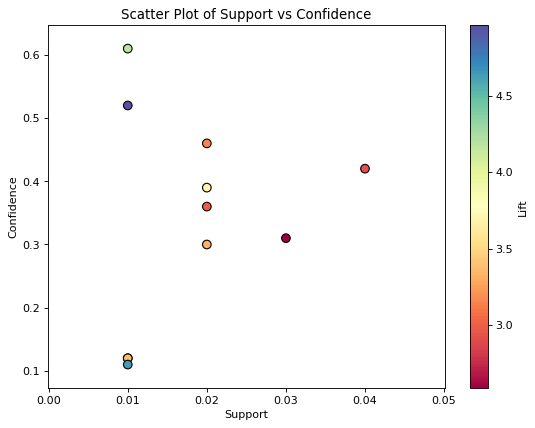

In [99]:
plt.figure(figsize=(8, 6), dpi=80)

plt.scatter(l,m,c=m1,  
            edgecolor ="black",  
            s = 60) 
  
plt.xlabel("Support") 
plt.ylabel("Confidence") 
c=plt.colorbar()
c.set_label('Lift')
plt.title("Scatter Plot of Support vs Confidence")
plt.show() 

##########################################################################################################

### Again I applied association analysis with mlextend library. In this, values can be taken as either 0 /1 or True/False. For this reason, I changed yes to 1 and no to 0 for VMail Plan and Int'l Plan and True as 1 and False as 0 for Churn variable. For CustServ Calls less than or equal to 0 as 0 and others as 1. In this library, we can only give minimum support value.

In [15]:
df3=df[["VMail Plan", "Int'l Plan" , "CustServ Calls", "Churn"]]
df4=df3.copy()

In [264]:
df4["VMail Plan"]=df4["VMail Plan"].map({'yes':1, 'no':0})
df4["Int'l Plan"]=df4["Int'l Plan"].map({'yes':1, 'no':0})
df4["Churn"]=df4["Churn"].map({'True.':1, 'False.':0})

In [116]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
sets = df4.applymap(encode_units)

In [121]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
fqs = apriori(sets, min_support=0.01, use_colnames=True)

In [122]:
fqs

,support,itemsets
0,0.276628,(VMail Plan)
1,0.096910,(Int'l Plan)
2,0.790879,(CustServ Calls)
3,0.144914,(Churn)
4,0.027603,"(VMail Plan, Int'l Plan)"
5,0.218722,"(VMail Plan, CustServ Calls)"
6,0.024002,"(VMail Plan, Churn)"
7,0.072007,"(Int'l Plan, CustServ Calls)"
8,0.041104,"(Int'l Plan, Churn)"
9,0.117312,"(Churn, CustServ Calls)"


### From above apriori algorithm, I got below rules. As in this library, we can not give antecedent length, therefore I filtered the required values. The highest value of lift is 4.6 and support in % is 1% and confidence is 11%. Rule I got for this lift value is International Plan associated with VMail Plan and Churn. From the plot of support vs confidence of 7 given rules, we can see that again as support is low confidence is high.

In [194]:
rules = association_rules(fqs, metric="lift", min_threshold=1)
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))

ruless=rules[ (rules['antecedent_len'] == 1) ]

In [197]:
qa=ruless.drop([3,4,8,15], axis=0)
qa

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(VMail Plan),(Int'l Plan),0.276628,0.096910,0.027603,0.099783,1.029650,0.000795,1.003192,1
1,(Int'l Plan),(VMail Plan),0.096910,0.276628,0.027603,0.284830,1.029650,0.000795,1.011469,1
2,(Int'l Plan),(Churn),0.096910,0.144914,0.041104,0.424149,2.926889,0.027060,1.484907,1
5,(CustServ Calls),(Churn),0.790879,0.144914,0.117312,0.148331,1.023575,0.002702,1.004011,1
9,(Int'l Plan),"(VMail Plan, Churn)",0.096910,0.024002,0.010801,0.111455,4.643498,0.008475,1.098422,1
11,(CustServ Calls),"(VMail Plan, Churn)",0.790879,0.024002,0.020102,0.025417,1.058948,0.001119,1.001452,1
14,(Int'l Plan),"(Churn, CustServ Calls)",0.096910,0.117312,0.029403,0.303406,2.586319,0.018034,1.267148,1


In [201]:
x=qa[["support"]]
y=qa[["confidence"]]

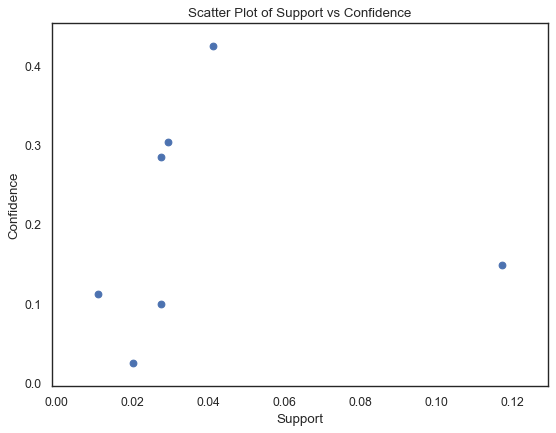

In [202]:
plt.figure(figsize=(8, 6), dpi=80)

plt.scatter(x,y)
  
plt.xlabel("Support") 
plt.ylabel("Confidence") 

plt.title("Scatter Plot of Support vs Confidence")
plt.show() 

### As in the above analysis, I took 0 in 0 CustServ Calls and others as 1. To explore this better I got dummies values for CustServ Calls. Also the varable names were not able to explain wheather they are showing yes or no, therefore I created dummies of all variables as below and did the analysis again. For the highest lift value(4.96), support is 1% and confidence is 52%. Rule is when customer service call is 5, Churn is True and International Plan is no. I got the same result as I got from apyori library after getting dummies. Other rules are also stated as below.

In [16]:
df5=pd.get_dummies(df3["CustServ Calls"], prefix=['CustServ Call'])

In [17]:
df5.head()

,['CustServ Call']_0,['CustServ Call']_1,['CustServ Call']_2,['CustServ Call']_3,['CustServ Call']_4,['CustServ Call']_5,['CustServ Call']_6,['CustServ Call']_7,['CustServ Call']_8,['CustServ Call']_9
0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0


In [18]:
df9=pd.get_dummies(df3)

In [19]:
df6=pd.concat([df9, df5], axis=1)
#df6.head()

In [20]:
df6=df6.drop(["CustServ Calls"], axis=1)

In [21]:
df6.head(5)

,VMail Plan_no,VMail Plan_yes,Int'l Plan_no,Int'l Plan_yes,Churn_False.,Churn_True.,['CustServ Call']_0,['CustServ Call']_1,['CustServ Call']_2,['CustServ Call']_3,['CustServ Call']_4,['CustServ Call']_5,['CustServ Call']_6,['CustServ Call']_7,['CustServ Call']_8,['CustServ Call']_9
0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0
1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0


In [22]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
fqs = apriori(df6, min_support=0.01, use_colnames=True)

In [293]:
fqs

,support,itemsets
0,0.723372,(VMail Plan_no)
1,0.276628,(VMail Plan_yes)
2,0.903090,(Int'l Plan_no)
3,0.096910,(Int'l Plan_yes)
4,0.855086,(Churn_False.)
...,...,...
117,0.014701,"(Churn_False., ['CustServ Call']_1, Int'l Plan..."
118,0.049805,"(VMail Plan_yes, ['CustServ Call']_0, Int'l Pl..."
119,0.090909,"(VMail Plan_yes, ['CustServ Call']_1, Int'l Pl..."
120,0.057606,"(['CustServ Call']_2, VMail Plan_yes, Int'l Pl..."


In [41]:
rules = association_rules(fqs, metric="lift", min_threshold=1)
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))

ruless=rules[(rules['antecedent_len'] == 1) ]
ruless=ruless.sort_values("lift", ascending=False).head(15).reset_index(drop=True)

### As per the project requirement, set the minimum support to 1%, the minimum rule confidence to 5%, and the maximum number of antecedents to 1. The minimum support used in the above analysis is not of only antecedent. To get the antecedent support less than 1% I filtered the values with lowest antecedent report. I got for antecedents CustServ Calls=5, Intl Plan=no, then consequent is Churn=true, actecedent support for this is 1.8% which is least. Similar other rules are also there with almost same antecedent support as below.

In [56]:
ruless=ruless.sort_values("lift", ascending=False).head(15).reset_index()
ru1=ruless.sort_values("antecedent support").reset_index(drop=True)

In [32]:
ru1.head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,"(['CustServ Call']_5, Int'l Plan_no)",(Churn_True.),0.018002,0.144914,0.010201,0.566667,3.910352,0.007592,1.973274,2
1,(['CustServ Call']_5),"(Churn_True., Int'l Plan_no)",0.019802,0.103810,0.010201,0.515152,4.962428,0.008145,1.848391,1
2,(['CustServ Call']_5),(Churn_True.),0.019802,0.144914,0.012001,0.606061,4.182195,0.009132,2.170602,1


In [297]:
qa=ruless.drop([3,5,8,10,11,12,14,15,18,19], axis=0)
qa.reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(['CustServ Call']_5),"(Churn_True., Int'l Plan_no)",0.019802,0.103810,0.010201,0.515152,4.962428,0.008145,1.848391,1
1,(Int'l Plan_yes),"(VMail Plan_yes, Churn_True.)",0.096910,0.024002,0.010801,0.111455,4.643498,0.008475,1.098422,1
2,(Int'l Plan_yes),"(Churn_True., ['CustServ Call']_0)",0.096910,0.027603,0.011701,0.120743,4.374310,0.009026,1.105931,1
3,(['CustServ Call']_5),(Churn_True.),0.019802,0.144914,0.012001,0.606061,4.182195,0.009132,2.170602,1
4,(['CustServ Call']_4),"(Churn_True., Int'l Plan_no)",0.049805,0.103810,0.019202,0.385542,3.713908,0.014032,1.458505,1
5,(Int'l Plan_yes),"(Churn_True., ['CustServ Call']_1)",0.096910,0.036604,0.012001,0.123839,3.383241,0.008454,1.099565,1
6,(['CustServ Call']_4),"(Churn_True., Int'l Plan_no, VMail Plan_no)",0.049805,0.090609,0.015002,0.301205,3.324224,0.010489,1.301370,1
7,(['CustServ Call']_4),(Churn_True.),0.049805,0.144914,0.022802,0.457831,3.159321,0.015585,1.577158,1
8,(['CustServ Call']_4),"(Churn_True., VMail Plan_no)",0.049805,0.120912,0.018002,0.361446,2.989327,0.011980,1.376685,1
9,(Int'l Plan_yes),(Churn_True.),0.096910,0.144914,0.041104,0.424149,2.926889,0.027060,1.484907,1


In [100]:
x=qa["support"]
y=qa["confidence"]
z=qa["lift"]

### The below plot is in between Support and Confidence of the above model. Colors are representing Lift values.  It shows that for smaller support values higer confidence and lift values are there.

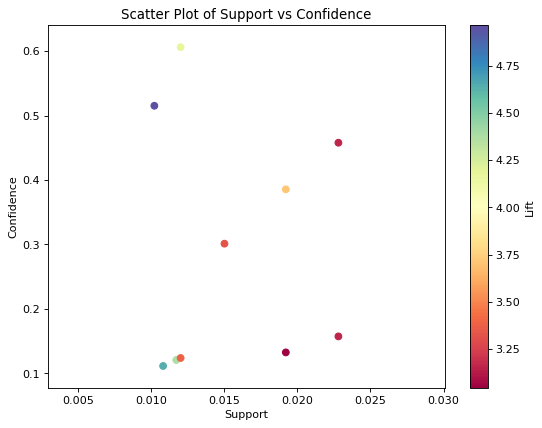

In [103]:
plt.figure(figsize=(8, 6), dpi=80)

plt.scatter(x,y, c=z)
  
plt.xlabel("Support") 
plt.ylabel("Confidence") 
c=plt.colorbar()
c.set_label('Lift')
plt.title("Scatter Plot of Support vs Confidence")
plt.show() 
 

## Conclusion

### For large data set, we do association analysis to understand the association between itemsets. For this apriori algorithm has been used frequently. For the analysis, I used two different python libraries Apyori and mlextend. In the assignment I set, the minimum support to 1%, the minimum rule confidence to 5%, and the maximum number of antecedents to 1. 

### From the apyori librari analysis, I got maximum lift to 4.96 whereas support is 1% and confidence is 52%. Moreover the rule is of antecedents is Customer service call 5 then consequents are True Churning and No international plan. Other results are also given. Same results were found from mlextend. Both libraries lack few necessary requirements as if one can set antecedent or consequent. Other rules were also found and stated above, like, International plan yes, then VMail plan yes and churn is true. 
